In [51]:
from functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
if os.path.exists('common_res'):
    pass
else:
    os.mkdir('common_res')

In [53]:
ctrl4m = ['Cell 1 ctrl 4m', 'Cell 2 ctrl 4m', 'Cell 3 ctrl 4m', 'Cell 4 ctrl 4m']
ctrl8m = ['Cell 1 ctrl 8m', 'Cell 2 ctrl 8m', 'Cell 3 ctrl 8m', 'Cell 4 ctrl 8m', 'Cell 5 ctrl 8m']
ad4m = ['Cell 1 ad 4m', 'Cell 2 ad 4m', 'Cell 3 ad 4m', 'Cell 4 ad 4m', 'Cell 5 ad 4m', 'Cell 6 ad 4m', 'Cell 7 ad 4m']
ad8m = ['Cell 1 ad 8m', 'Cell 3 ad 8m', 'Cell 4 ad 8m', 'Cell 6 ad 8m', 'Cell 7 ad 8m']

In [54]:
files = [ctrl4m, ctrl8m, ad4m, ad8m]

Electric cell parameters

In [131]:
electric_param = {}
r_s = {}
r_in = {}
c = {}
for f in files:
    for item in f:
        electric_param[item] = pd.read_csv(f'{item}\electric_cell_param.csv')
        r_s[item] = np.array(electric_param[item]['R_s, Mohm'])
        r_in[item] = np.array(electric_param[item]['R_in, Mohm'])
        c[item] = np.array(electric_param[item]['C, pF'])

In [56]:
dict_df_r_s = {}
for k in r_s.keys():
    dict_df_r_s[k] = pd.DataFrame.from_dict(r_s[k])
    
dict_df_r_in = {}
for k in r_in.keys():
    dict_df_r_in[k] = pd.DataFrame.from_dict(r_in[k])
    
dict_df_c = {}
for k in c.keys():
    dict_df_c[k] = pd.DataFrame.from_dict(c[k])

In [57]:
start_ser = [0, 54, 100, 162]
stop_ser = [30, 72, 118, 198]

In [58]:
def series_numeration(x):
    results_keys = ['CTRL', 'GABA1', 'GABA5', 'PTX']
    for i in range(len(start_ser)):
        if start_ser[i] <= x <= stop_ser[i]:
            return results_keys[i]

In [59]:
for k, v in dict_df_r_s.items():
    v['sweep_number'] = [i for i in range(len(r_s[k]))]
    v['series'] = v.sweep_number.apply(series_numeration)
    
for k, v in dict_df_r_in.items():
    v['sweep_number'] = [i for i in range(len(r_in[k]))]
    v['series'] = v.sweep_number.apply(series_numeration)
    
for k, v in dict_df_c.items():
    v['sweep_number'] = [i for i in range(len(c[k]))]
    v['series'] = v.sweep_number.apply(series_numeration)

In [60]:
frames0_r_s = [dict_df_r_s[k] for k in ctrl4m]
r_s_ctrl_4m = pd.concat(frames0_r_s)
r_s_ctrl_4m.rename(columns = {0:'R_s'}, inplace = True)
r_s_ctrl_4m['type'] = ['CTRL'] * len(np.array(r_s_ctrl_4m['R_s']))

frames0_r_in = [dict_df_r_in[k] for k in ctrl4m]
r_in_ctrl_4m = pd.concat(frames0_r_in)
r_in_ctrl_4m.rename(columns = {0:'R_in'}, inplace = True)
r_in_ctrl_4m['type'] = ['CTRL'] * len(np.array(r_in_ctrl_4m['R_in']))

frames0_c = [dict_df_c[k] for k in ctrl4m] 
c_ctrl_4m = pd.concat(frames0_c)
c_ctrl_4m.rename(columns = {0:'C'}, inplace = True)
c_ctrl_4m['type'] = ['CTRL'] * len(np.array(c_ctrl_4m['C']))

In [61]:
frames1_r_s = [dict_df_r_s[k] for k in ad4m]
r_s_ad_4m = pd.concat(frames1_r_s)
r_s_ad_4m.rename(columns = {0:'R_s'}, inplace = True)
r_s_ad_4m['type'] = ['5xFAD'] * len(np.array(r_s_ad_4m['R_s']))

frames1_r_in = [dict_df_r_in[k] for k in ad4m]
r_in_ad_4m = pd.concat(frames1_r_in)
r_in_ad_4m.rename(columns = {0:'R_in'}, inplace = True)
r_in_ad_4m['type'] = ['5xFAD'] * len(np.array(r_in_ad_4m['R_in']))

frames1_c = [dict_df_c[k] for k in ad4m]
c_ad_4m = pd.concat(frames1_c)
c_ad_4m.rename(columns = {0:'C'}, inplace = True)
c_ad_4m['type'] = ['5xFAD'] * len(np.array(c_ad_4m['C']))

In [62]:
r_s_4m = pd.concat([r_s_ctrl_4m, r_s_ad_4m])
r_in_4m = pd.concat([r_in_ctrl_4m, r_in_ad_4m])
c_4m = pd.concat([c_ctrl_4m, c_ad_4m])

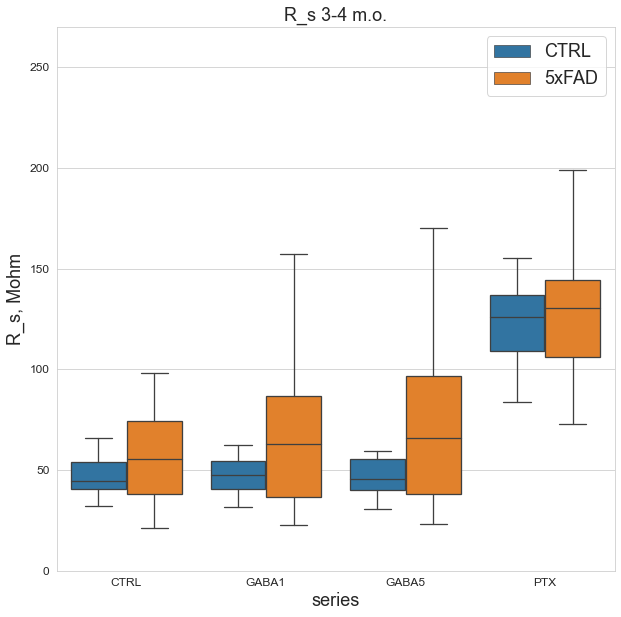

In [63]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=r_s_4m, x="series", y="R_s", hue="type", linewidth = 1.3, showfliers=False)
ax.set_title('R_s 3-4 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('R_s, Mohm', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(0,270)
plt.savefig('common_res/R_s_3_4_month.png')
plt.savefig('common_res/R_s_3_4_month.pdf')
plt.show();

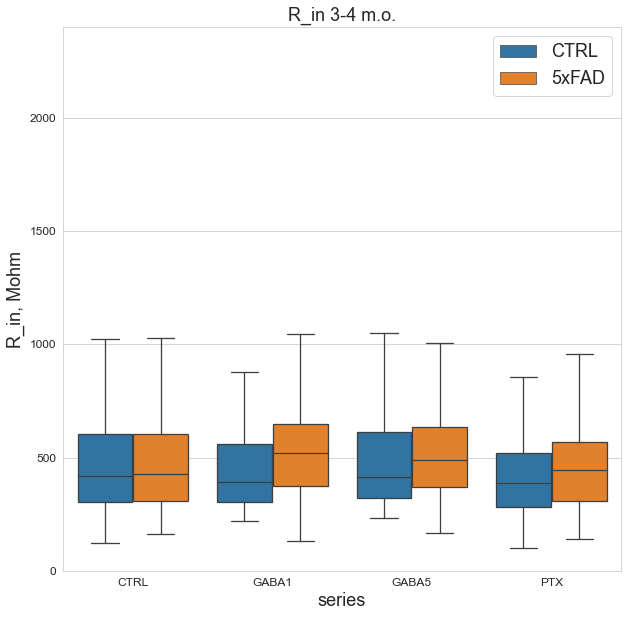

In [64]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=r_in_4m, x="series", y="R_in", hue="type", linewidth = 1.3, showfliers=False)
ax.set_title('R_in 3-4 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('R_in, Mohm', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(0,2400)
plt.savefig('common_res/R_in_3_4_month.png')
plt.savefig('common_res/R_in_3_4_month.pdf')
plt.show();

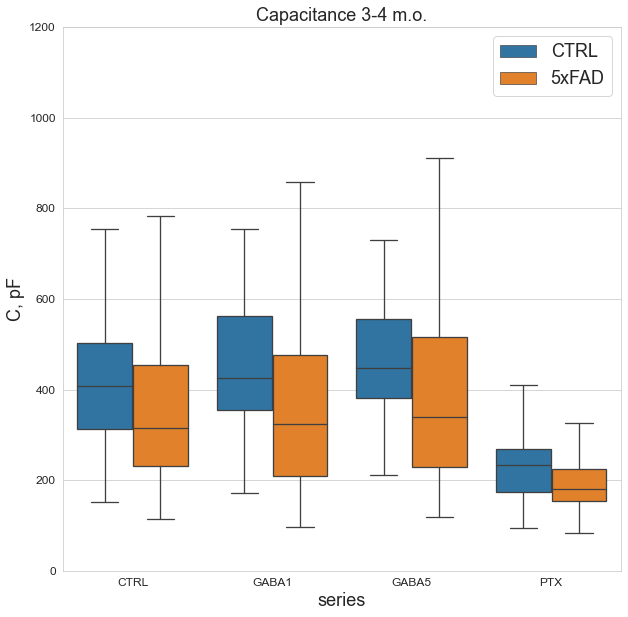

In [65]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=c_4m, x="series", y="C", hue="type", linewidth = 1.3, showfliers=False)
ax.set_title('Capacitance 3-4 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('C, pF', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(0,1200)
plt.savefig('common_res/C_3_4_month.png')
plt.savefig('common_res/C_3_4_month.pdf')
plt.show();

In [66]:
frames2_r_s = [dict_df_r_s[k] for k in ctrl8m]
r_s_ctrl_8m = pd.concat(frames2_r_s)
r_s_ctrl_8m.rename(columns = {0:'R_s'}, inplace = True)
r_s_ctrl_8m['type'] = ['CTRL'] * len(np.array(r_s_ctrl_8m['R_s']))

frames2_r_in = [dict_df_r_in[k] for k in ctrl8m]
r_in_ctrl_8m = pd.concat(frames2_r_in)
r_in_ctrl_8m.rename(columns = {0:'R_in'}, inplace = True)
r_in_ctrl_8m['type'] = ['CTRL'] * len(np.array(r_in_ctrl_8m['R_in']))

frames2_c = [dict_df_c[k] for k in ctrl8m]
c_ctrl_8m = pd.concat(frames2_c)
c_ctrl_8m.rename(columns = {0:'C'}, inplace = True)
c_ctrl_8m['type'] = ['CTRL'] * len(np.array(c_ctrl_8m['C']))

In [67]:
frames3_r_s = [dict_df_r_s[k] for k in ad8m]
r_s_ad_8m = pd.concat(frames3_r_s)
r_s_ad_8m.rename(columns = {0:'R_s'}, inplace = True)
r_s_ad_8m['type'] = ['5xFAD'] * len(np.array(r_s_ad_8m['R_s']))

frames3_r_in = [dict_df_r_in[k] for k in ad8m]
r_in_ad_8m = pd.concat(frames3_r_in)
r_in_ad_8m.rename(columns = {0:'R_in'}, inplace = True)
r_in_ad_8m['type'] = ['5xFAD'] * len(np.array(r_in_ad_8m['R_in']))

frames3_c = [dict_df_c[k] for k in ad8m]
c_ad_8m = pd.concat(frames3_c)
c_ad_8m.rename(columns = {0:'C'}, inplace = True)
c_ad_8m['type'] = ['5xFAD'] * len(np.array(c_ad_8m['C']))

In [68]:
r_s_8m = pd.concat([r_s_ctrl_8m, r_s_ad_8m])
r_in_8m = pd.concat([r_in_ctrl_8m, r_in_ad_8m])
c_8m = pd.concat([c_ctrl_8m, c_ad_8m])

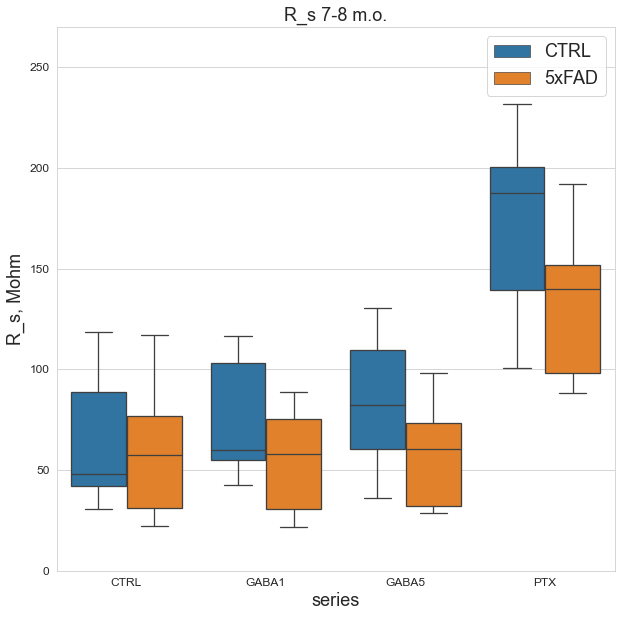

In [69]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=r_s_8m, x="series", y="R_s", hue="type", linewidth = 1.3, showfliers=False)
ax.set_title('R_s 7-8 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('R_s, Mohm', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(0,270)
plt.savefig('common_res/R_s_7_8_month.png')
plt.savefig('common_res/R_s_7_8_month.pdf')
plt.show();

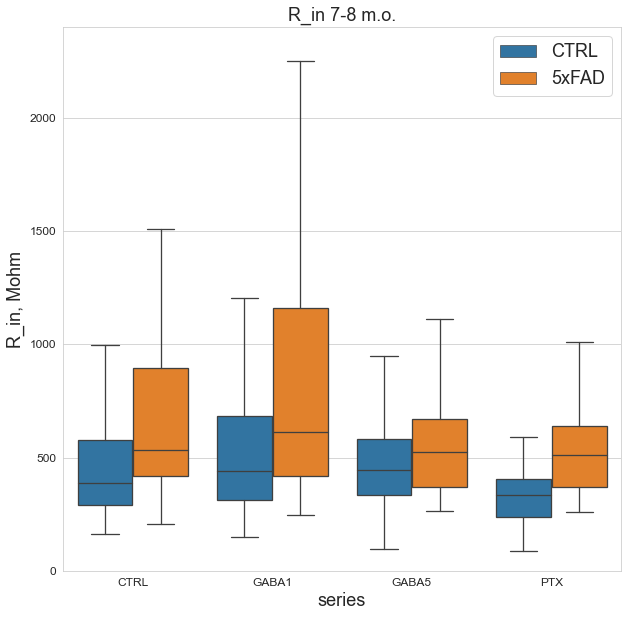

In [70]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=r_in_8m, x="series", y="R_in", hue="type", linewidth = 1.3, showfliers=False)
ax.set_title('R_in 7-8 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('R_in, Mohm', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(0,2400)
plt.savefig('common_res/R_in_7_8_month.png')
plt.savefig('common_res/R_in_7_8_month.pdf')
plt.show();

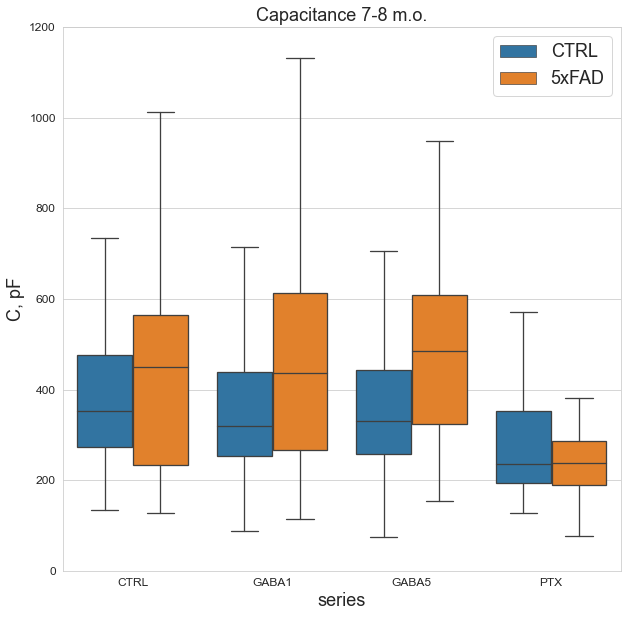

In [71]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=c_8m, x="series", y="C", hue="type", linewidth = 1.3, showfliers=False)
ax.set_title('Capacitance 7-8 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('C, pF', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(0,1200)
plt.savefig('common_res/C_7_8_month.png')
plt.savefig('common_res/C_7_8_month.pdf')
plt.show();

Baseline parameters

In [72]:
tonic_cur = {}
for f in files:
    for item in f:
        tonic_cur[item] = pd.read_csv(f'{item}\_tonic_cur.csv')

In [73]:
for k, v in tonic_cur.items():
    v['series'] = ['GABA1', 'GABA5', 'PTX']

In [74]:
frames0_i_tonic = [tonic_cur[k] for k in ctrl4m] 
tonic_cur_ctrl_4m = pd.concat(frames0_i_tonic)
tonic_cur_ctrl_4m['type'] = ['CTRL'] * len(np.array(tonic_cur_ctrl_4m['Iton, pA']))

frames1_i_tonic = [tonic_cur[k] for k in ad4m]
tonic_cur_ad_4m = pd.concat(frames1_i_tonic)
tonic_cur_ad_4m['type'] = ['5xFAD'] * len(np.array(tonic_cur_ad_4m['Iton, pA']))

i_tonic_4m = pd.concat([tonic_cur_ctrl_4m, tonic_cur_ad_4m])

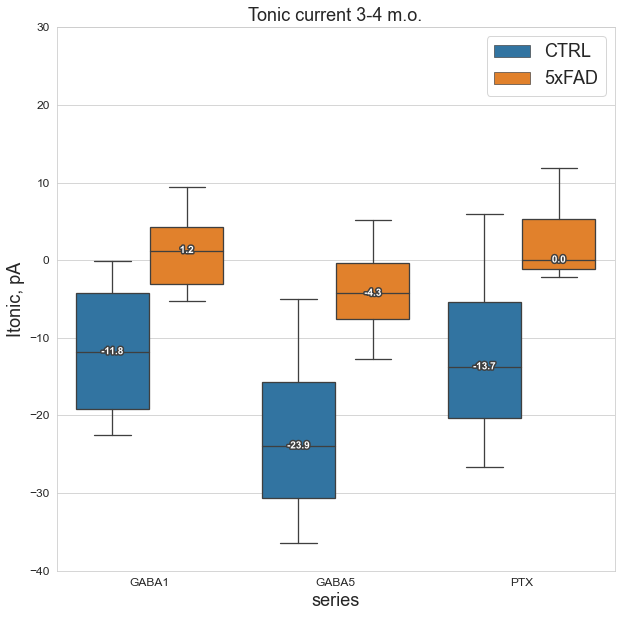

In [77]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=i_tonic_4m, x="series", y="Iton, pA", hue="type", linewidth = 1.3, showfliers=False)
add_median_labels(ax)
ax.set_title('Tonic current 3-4 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('Itonic, pA', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(-40,30)
plt.savefig('common_res/Itonic_3_4_month.png')
plt.savefig('common_res/Itonic_3_4_month.pdf')
plt.show();

In [78]:
frames2_i_tonic = [tonic_cur[k] for k in ctrl8m]
tonic_cur_ctrl_8m = pd.concat(frames2_i_tonic)
tonic_cur_ctrl_8m['type'] = ['CTRL'] * len(np.array(tonic_cur_ctrl_8m['Iton, pA']))

frames3_i_tonic = [tonic_cur[k] for k in ad8m]
tonic_cur_ad_8m = pd.concat(frames3_i_tonic)
tonic_cur_ad_8m['type'] = ['5xFAD'] * len(np.array(tonic_cur_ad_8m['Iton, pA']))

i_tonic_8m = pd.concat([tonic_cur_ctrl_8m, tonic_cur_ad_8m])

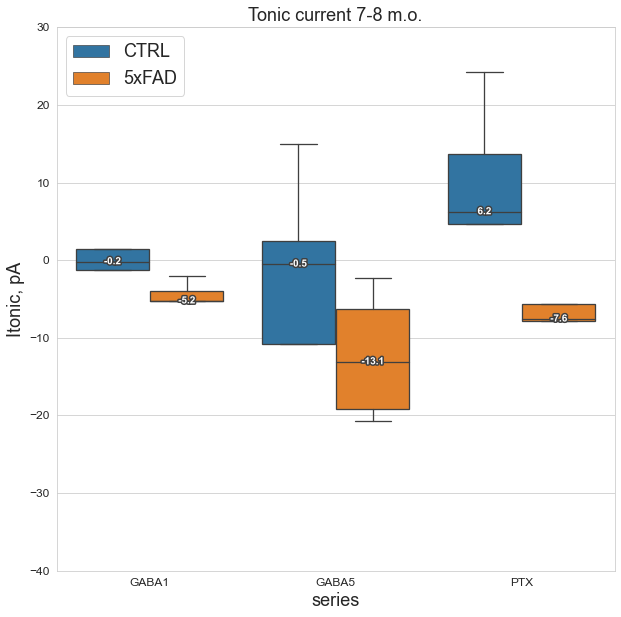

In [79]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=i_tonic_8m, x="series", y="Iton, pA", hue="type", linewidth = 1.3, showfliers=False)
add_median_labels(ax)
ax.set_title('Tonic current 7-8 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('Itonic, pA', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(-40,30)
plt.savefig('common_res/Itonic_7_8_month.png')
plt.savefig('common_res/Itonic_7_8_month.pdf')
plt.show();

In [80]:
baseline_param = {}
i_h = {}
i_h_noise = {}
for f in files:
    for item in f:
        baseline_param[item] = pd.read_csv(f'{item}\_baseline_param.csv')
        i_h[item] = np.array(baseline_param[item]['Ihold, pA'])
        i_h_noise[item] = np.array(baseline_param[item]['Inoise, pA'])

In [81]:
dict_df_i_h = {}
for k in r_s.keys():
    dict_df_i_h[k] = pd.DataFrame.from_dict(i_h[k])
    
dict_df_i_h_noise = {}
for k in i_h_noise.keys():
    dict_df_i_h_noise[k] = pd.DataFrame.from_dict(i_h_noise[k])

In [82]:
start_ser = [0, 54, 100, 162]
stop_ser = [30, 72, 118, 198]

In [83]:
def series_numeration(x):
    results_keys = ['CTRL', 'GABA1', 'GABA5', 'PTX']
    for i in range(len(start_ser)):
        if start_ser[i] <= x <= stop_ser[i]:
            return results_keys[i]

In [84]:
for k, v in dict_df_i_h.items():
    v['sweep_number'] = [i for i in range(len(i_h[k]))]
    v['series'] = v.sweep_number.apply(series_numeration)
    
for k, v in dict_df_i_h_noise.items():
    v['sweep_number'] = [i for i in range(len(i_h_noise[k]))]
    v['series'] = v.sweep_number.apply(series_numeration)

In [85]:
frames0_i_h = [dict_df_i_h[k] for k in ctrl4m]
i_h_ctrl_4m = pd.concat(frames0_i_h)
i_h_ctrl_4m.rename(columns = {0:'I hold'}, inplace = True)
i_h_ctrl_4m['type'] = ['CTRL'] * len(np.array(i_h_ctrl_4m['I hold']))

frames0_i_h_noise = [dict_df_i_h_noise[k] for k in ctrl4m]
i_h_noise_ctrl_4m = pd.concat(frames0_i_h_noise)
i_h_noise_ctrl_4m.rename(columns = {0:'i_h_noise'}, inplace = True)
i_h_noise_ctrl_4m['type'] = ['CTRL'] * len(np.array(i_h_noise_ctrl_4m['i_h_noise']))

In [86]:
frames1_i_h = [dict_df_i_h[k] for k in ad4m]
i_h_ad_4m = pd.concat(frames1_i_h)
i_h_ad_4m.rename(columns = {0:'I hold'}, inplace = True)
i_h_ad_4m['type'] = ['5xFAD'] * len(np.array(i_h_ad_4m['I hold']))

frames1_i_h_noise = [dict_df_i_h_noise[k] for k in ad4m]
i_h_noise_ad_4m = pd.concat(frames1_i_h_noise)
i_h_noise_ad_4m.rename(columns = {0:'i_h_noise'}, inplace = True)
i_h_noise_ad_4m['type'] = ['5xFAD'] * len(np.array(i_h_noise_ad_4m['i_h_noise']))

In [87]:
i_h_4m = pd.concat([i_h_ctrl_4m, i_h_ad_4m])
i_h_noise_4m = pd.concat([i_h_noise_ctrl_4m, i_h_noise_ad_4m])

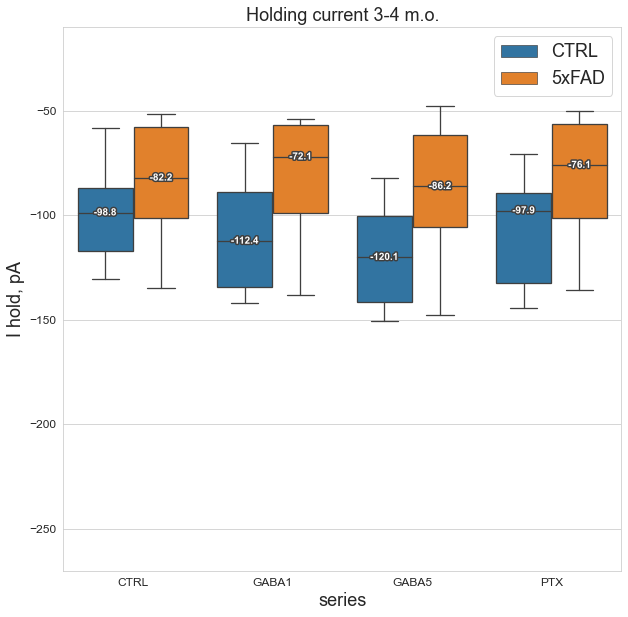

In [88]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=i_h_4m, x="series", y="I hold", hue="type", linewidth = 1.3, showfliers=False)
add_median_labels(ax)
ax.set_title('Holding current 3-4 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('I hold, pA', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(-270,-10)
plt.savefig('common_res/I_h_3_4_month.png')
plt.savefig('common_res/I_h_3_4_month.pdf')
plt.show();

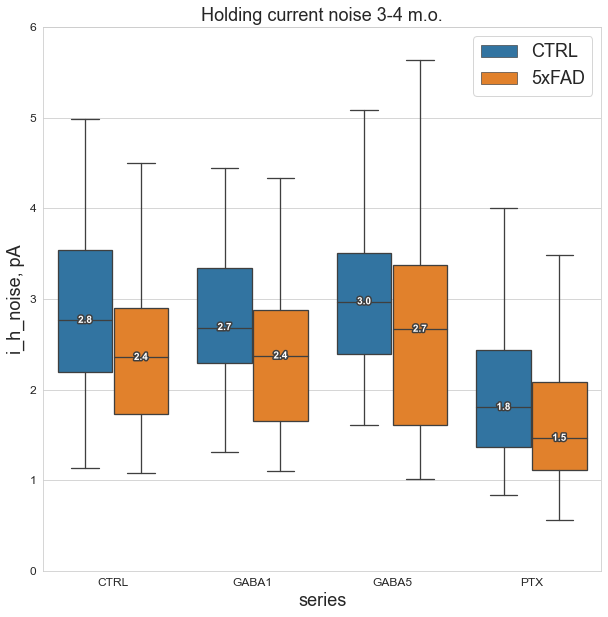

In [89]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=i_h_noise_4m, x="series", y="i_h_noise", hue="type", linewidth = 1.3, showfliers=False)
add_median_labels(ax)
ax.set_title('Holding current noise 3-4 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('i_h_noise, pA', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(0,6)
plt.savefig('common_res/I_h_noise_3_4_month.png')
plt.savefig('common_res/I_h_noise_3_4_month.pdf')
plt.show();

In [90]:
frames2_i_h = [dict_df_i_h[k] for k in ctrl8m]
i_h_ctrl_8m = pd.concat(frames2_i_h)
i_h_ctrl_8m.rename(columns = {0:'I hold'}, inplace = True)
i_h_ctrl_8m['type'] = ['CTRL'] * len(np.array(i_h_ctrl_8m['I hold']))

frames2_i_h_noise = [dict_df_i_h_noise[k] for k in ctrl8m]
i_h_noise_ctrl_8m = pd.concat(frames2_i_h_noise)
i_h_noise_ctrl_8m.rename(columns = {0:'i_h_noise'}, inplace = True)
i_h_noise_ctrl_8m['type'] = ['CTRL'] * len(np.array(i_h_noise_ctrl_8m['i_h_noise']))

In [91]:
frames3_i_h = [dict_df_i_h[k] for k in ad8m]
i_h_ad_8m = pd.concat(frames3_i_h)
i_h_ad_8m.rename(columns = {0:'I hold'}, inplace = True)
i_h_ad_8m['type'] = ['5xFAD'] * len(np.array(i_h_ad_8m['I hold']))

frames3_i_h_noise = [dict_df_i_h_noise[k] for k in ad8m]
i_h_noise_ad_8m = pd.concat(frames3_i_h_noise)
i_h_noise_ad_8m.rename(columns = {0:'i_h_noise'}, inplace = True)
i_h_noise_ad_8m['type'] = ['5xFAD'] * len(np.array(i_h_noise_ad_8m['i_h_noise']))

In [92]:
i_h_8m = pd.concat([i_h_ctrl_8m, i_h_ad_8m])
i_h_noise_8m = pd.concat([i_h_noise_ctrl_8m, i_h_noise_ad_8m])

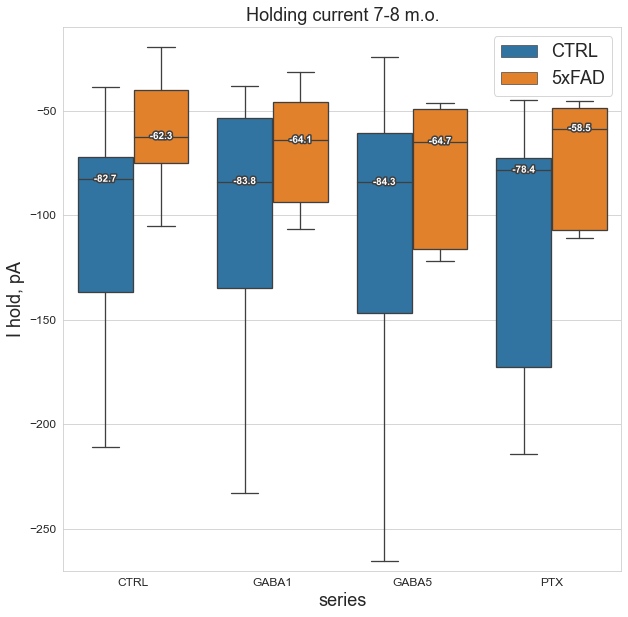

In [93]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=i_h_8m, x="series", y="I hold", hue="type", linewidth = 1.3, showfliers=False)
add_median_labels(ax)
ax.set_title('Holding current 7-8 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('I hold, pA', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(-270,-10)
plt.savefig('common_res/I_h_7_8_month.png')
plt.savefig('common_res/I_h_7_8_month.pdf')
plt.show();

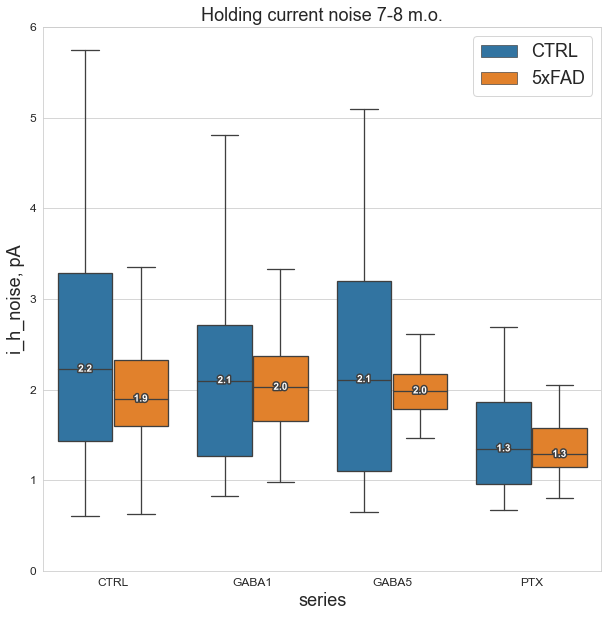

In [94]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=i_h_noise_8m, x="series", y="i_h_noise", hue="type", linewidth = 1.3, showfliers=False)
add_median_labels(ax)
ax.set_title('Holding current noise 7-8 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('i_h_noise, pA', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(0,6)
plt.savefig('common_res/I_h_noise_7_8_month.png')
plt.savefig('common_res/I_h_noise_7_8_month.pdf')
plt.show();

Event parameters

In [95]:
event_param = {}
amplitudes = {}
tau_decay = {}
rise_rate = {}
for f in files:
    for item in f:
        event_param[item] = pd.read_csv(f'{item}\event_param.csv')
        amplitudes[item] = np.array(event_param[item]['amplitudes'])
        tau_decay[item] = np.array(event_param[item]['tau_decay'])
        rise_rate[item] = np.array(event_param[item]['rise_rate_10_90'])

In [96]:
dict_df_amplitudes = {}
for k in amplitudes.keys():
    dict_df_amplitudes[k] = pd.DataFrame.from_dict(amplitudes[k])
    
dict_df_tau_decay = {}
for k in tau_decay.keys():
    dict_df_tau_decay[k] = pd.DataFrame.from_dict(tau_decay[k])
    
dict_df_rise_rate = {}
for k in rise_rate.keys():
    dict_df_rise_rate[k] = pd.DataFrame.from_dict(rise_rate[k])

In [97]:
start_ser = [0, 54, 100]
stop_ser = [30, 72, 118]

In [98]:
def series_numeration(x):
    results_keys = ['CTRL', 'GABA1', 'GABA5']
    for i in range(len(start_ser)):
        if start_ser[i] <= x <= stop_ser[i]:
            return results_keys[i]

In [99]:
for k, v in dict_df_amplitudes.items():
    v['sweep_number'] = [i for i in range(len(amplitudes[k]))]
    v['series'] = v.sweep_number.apply(series_numeration)
    
for k, v in dict_df_tau_decay.items():
    v['sweep_number'] = [i for i in range(len(tau_decay[k]))]
    v['series'] = v.sweep_number.apply(series_numeration)
    
for k, v in dict_df_rise_rate.items():
    v['sweep_number'] = [i for i in range(len(rise_rate[k]))]
    v['series'] = v.sweep_number.apply(series_numeration)

In [100]:
frames0_amplitudes = [dict_df_amplitudes[k] for k in ctrl4m]
amplitudes_ctrl_4m = pd.concat(frames0_amplitudes)
amplitudes_ctrl_4m.rename(columns = {0:'Ampl'}, inplace = True)
amplitudes_ctrl_4m['type'] = ['CTRL'] * len(np.array(amplitudes_ctrl_4m['Ampl']))

frames0_tau_decay = [dict_df_tau_decay[k] for k in ctrl4m]
tau_decay_ctrl_4m = pd.concat(frames0_tau_decay)
tau_decay_ctrl_4m.rename(columns = {0:'tau_decay'}, inplace = True)
tau_decay_ctrl_4m['type'] = ['CTRL'] * len(np.array(tau_decay_ctrl_4m['tau_decay']))

frames0_rise_rate = [dict_df_rise_rate[k] for k in ctrl4m]
rise_rate_ctrl_4m = pd.concat(frames0_rise_rate)
rise_rate_ctrl_4m.rename(columns = {0:'rise_rate'}, inplace = True)
rise_rate_ctrl_4m['type'] = ['CTRL'] * len(np.array(rise_rate_ctrl_4m['rise_rate']))

In [102]:
frames1_amplitudes = [dict_df_amplitudes[k] for k in ad4m]
amplitudes_ad_4m = pd.concat(frames1_amplitudes)
amplitudes_ad_4m.rename(columns = {0:'Ampl'}, inplace = True)
amplitudes_ad_4m['type'] = ['5xFAD'] * len(np.array(amplitudes_ad_4m['Ampl']))

frames1_tau_decay = [dict_df_tau_decay[k] for k in ad4m]
tau_decay_ad_4m = pd.concat(frames1_tau_decay)
tau_decay_ad_4m.rename(columns = {0:'tau_decay'}, inplace = True)
tau_decay_ad_4m['type'] = ['5xFAD'] * len(np.array(tau_decay_ad_4m['tau_decay']))

frames1_rise_rate = [dict_df_rise_rate[k] for k in ad4m]
rise_rate_ad_4m = pd.concat(frames1_rise_rate)
rise_rate_ad_4m.rename(columns = {0:'rise_rate'}, inplace = True)
rise_rate_ad_4m['type'] = ['5xFAD'] * len(np.array(rise_rate_ad_4m['rise_rate']))

In [103]:
amplitudes_4m = pd.concat([amplitudes_ctrl_4m, amplitudes_ad_4m])
tau_decay_4m = pd.concat([tau_decay_ctrl_4m, tau_decay_ad_4m])
rise_rate_4m = pd.concat([rise_rate_ctrl_4m, rise_rate_ad_4m])

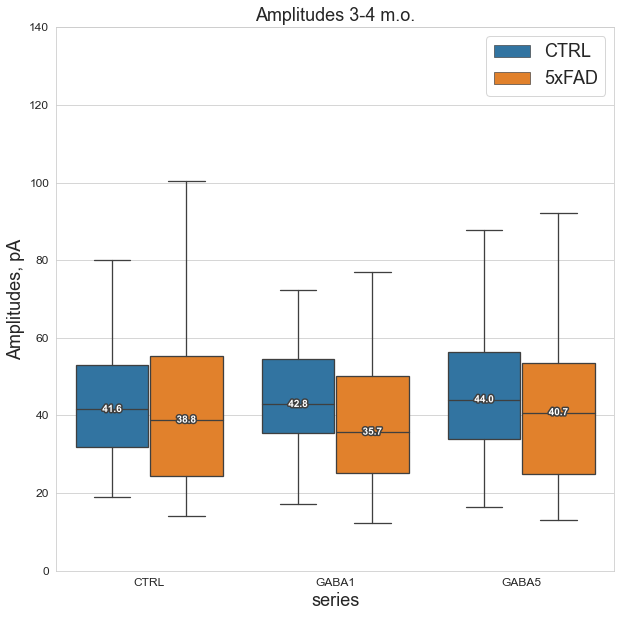

In [104]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=amplitudes_4m, x='series', y='Ampl', hue="type", linewidth = 1.3, showfliers=False)
add_median_labels(ax)
ax.set_title('Amplitudes 3-4 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('Amplitudes, pA', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(0,140)
plt.savefig('common_res/Amplitudes_3_4_month.png')
plt.savefig('common_res/Amplitudes_3_4_month.pdf')
plt.show();

In [105]:
amplitudes_ad_4m[amplitudes_ad_4m.series == 'CTRL'].describe()

,Ampl,sweep_number
count,217.000000,217.000000
mean,46.174880,15.000000
std,33.697006,8.964952
min,14.109000,0.000000
25%,24.325000,7.000000
50%,38.802000,15.000000
75%,55.313000,23.000000
max,261.606000,30.000000


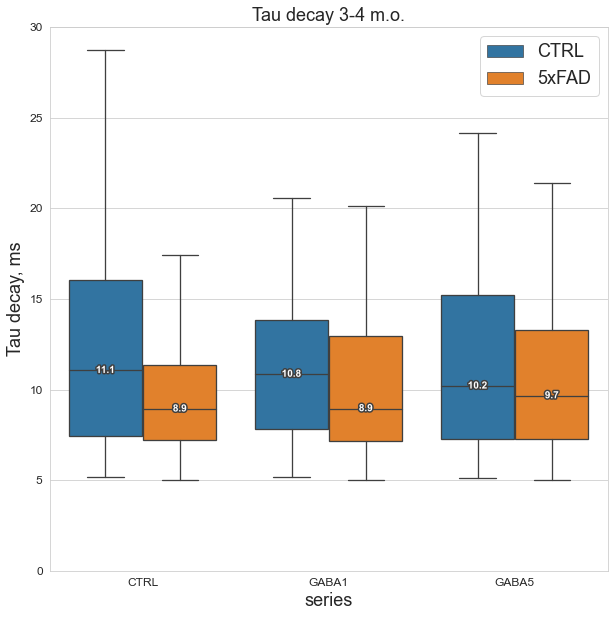

In [106]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=tau_decay_4m, x="series", y="tau_decay", hue="type", linewidth = 1.3, showfliers=False)
add_median_labels(ax)
ax.set_title('Tau decay 3-4 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('Tau decay, ms', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(0,30)
plt.savefig('common_res/Tau_decay_3_4_month.png')
plt.savefig('common_res/Tau_decay_3_4_month.pdf')
plt.show();

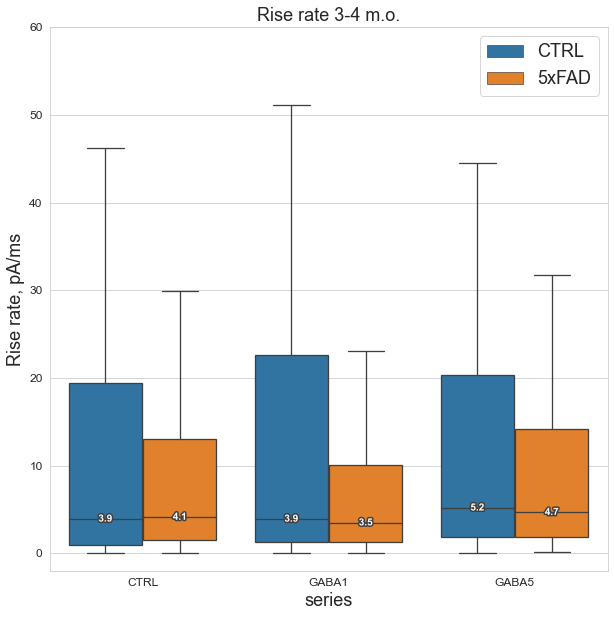

In [107]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=rise_rate_4m, x="series", y="rise_rate", hue="type", linewidth = 1.3, showfliers=False)
add_median_labels(ax)
ax.set_title('Rise rate 3-4 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('Rise rate, pA/ms', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(-2,60)
plt.savefig('common_res/Rise_rate_3_4_month.png')
plt.savefig('common_res/Rise_rate_3_4_month.pdf')
plt.show();

In [108]:
frames2_amplitudes = [dict_df_amplitudes[k] for k in ctrl8m]
amplitudes_ctrl_8m = pd.concat(frames2_amplitudes)
amplitudes_ctrl_8m.rename(columns = {0:'amplitudes'}, inplace = True)
amplitudes_ctrl_8m['type'] = ['CTRL'] * len(np.array(amplitudes_ctrl_8m['amplitudes']))

frames2_tau_decay = [dict_df_tau_decay[k] for k in ctrl8m]
tau_decay_ctrl_8m = pd.concat(frames2_tau_decay)
tau_decay_ctrl_8m.rename(columns = {0:'tau_decay'}, inplace = True)
tau_decay_ctrl_8m['type'] = ['CTRL'] * len(np.array(tau_decay_ctrl_8m['tau_decay']))

frames2_rise_rate = [dict_df_rise_rate[k] for k in ctrl8m]
rise_rate_ctrl_8m = pd.concat(frames2_rise_rate)
rise_rate_ctrl_8m.rename(columns = {0:'rise_rate'}, inplace = True)
rise_rate_ctrl_8m['type'] = ['CTRL'] * len(np.array(rise_rate_ctrl_8m['rise_rate']))

In [109]:
frames3_amplitudes = [dict_df_amplitudes[k] for k in ad8m]
amplitudes_ad_8m = pd.concat(frames3_amplitudes)
amplitudes_ad_8m.rename(columns = {0:'amplitudes'}, inplace = True)
amplitudes_ad_8m['type'] = ['5xFAD'] * len(np.array(amplitudes_ad_8m['amplitudes']))

frames3_tau_decay = [dict_df_tau_decay[k] for k in ad8m]
tau_decay_ad_8m = pd.concat(frames3_tau_decay)
tau_decay_ad_8m.rename(columns = {0:'tau_decay'}, inplace = True)
tau_decay_ad_8m['type'] = ['5xFAD'] * len(np.array(tau_decay_ad_8m['tau_decay']))

frames3_rise_rate = [dict_df_rise_rate[k] for k in ad8m]
rise_rate_ad_8m = pd.concat(frames3_rise_rate)
rise_rate_ad_8m.rename(columns = {0:'rise_rate'}, inplace = True)
rise_rate_ad_8m['type'] = ['5xFAD'] * len(np.array(rise_rate_ad_8m['rise_rate']))

In [110]:
amplitudes_8m = pd.concat([amplitudes_ctrl_8m, amplitudes_ad_8m])
tau_decay_8m = pd.concat([tau_decay_ctrl_8m, tau_decay_ad_8m])
rise_rate_8m = pd.concat([rise_rate_ctrl_8m, rise_rate_ad_8m])

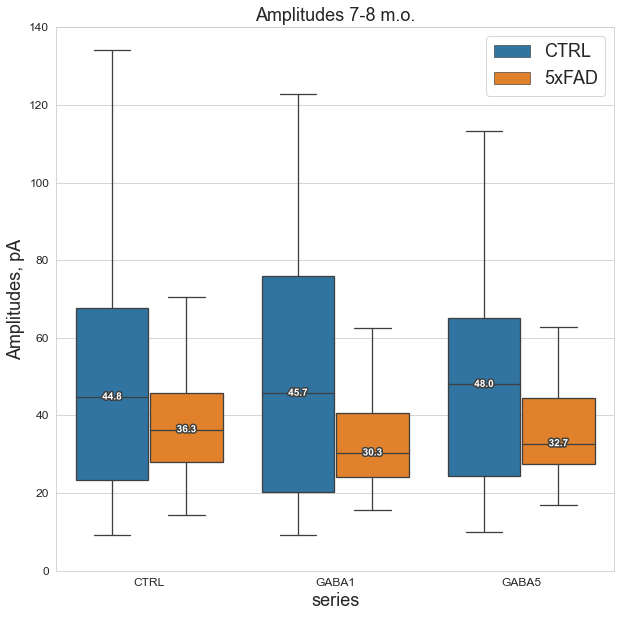

In [111]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=amplitudes_8m, x="series", y="amplitudes", hue="type", linewidth = 1.3, showfliers=False)
add_median_labels(ax)
ax.set_title('Amplitudes 7-8 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('Amplitudes, pA', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(0,140)
plt.savefig('common_res/Amplitudes_7_8_month.png')
plt.savefig('common_res/Amplitudes_7_8_month.pdf')
plt.show();

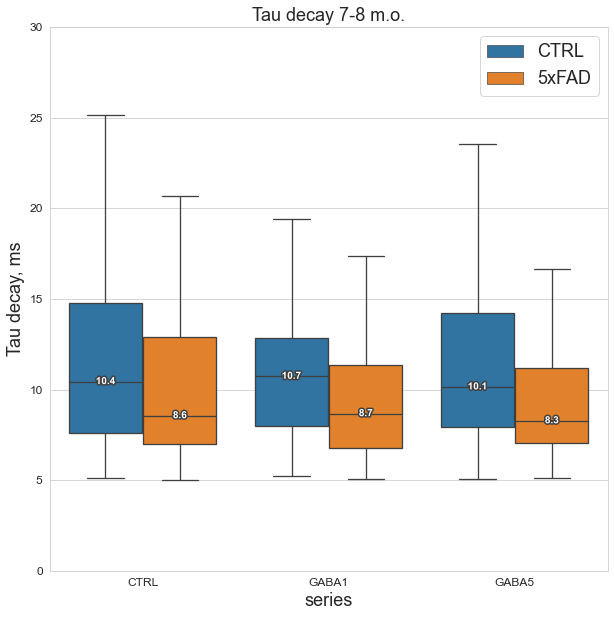

In [112]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=tau_decay_8m, x="series", y="tau_decay", hue="type", linewidth = 1.3, showfliers=False)
add_median_labels(ax)
ax.set_title('Tau decay 7-8 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('Tau decay, ms', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(0,30)
plt.savefig('common_res/Tau_decay_7_8_month.png')
plt.savefig('common_res/Tau_decay_7_8_month.pdf')
plt.show();

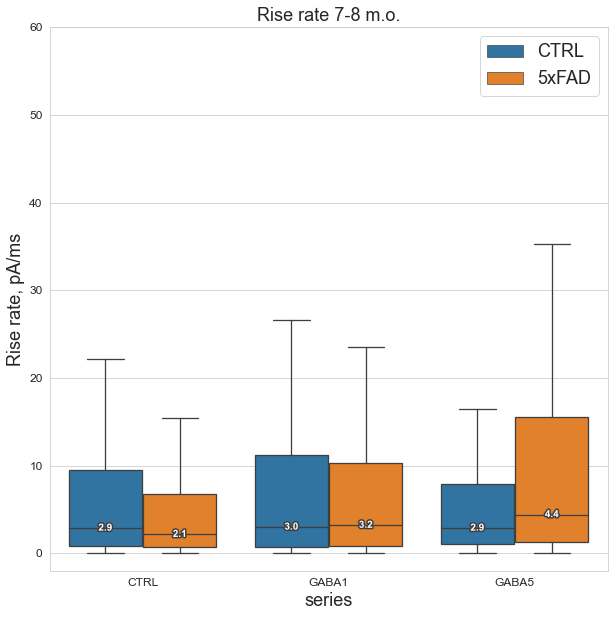

In [113]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=rise_rate_8m, x="series", y="rise_rate", hue="type", linewidth = 1.3, showfliers=False)
add_median_labels(ax)
ax.set_title('Rise rate 7-8 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('Rise rate, pA/ms', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(-2,60)
plt.savefig('common_res/Rise_rate_7_8_month.png')
plt.savefig('common_res/Rise_rate_7_8_month.pdf')
plt.show();

In [114]:
spont_freqs = {}
for f in files:
    for item in f:
        spont_freqs[item] = pd.read_csv(f'{item}\spont_freqs.csv')

In [115]:
ar_ctrl = []
for k in ctrl4m:
    ar_ctrl.append(spont_freqs[k][spont_freqs[k]['ser']=='CTRL'].values.T[1:][:-2])
spont_fr_ctrl_ctrl_4m = []
for ar in ar_ctrl:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_ctrl_ctrl_4m.append(ar[k][i])
spont_fr_ctrl_ctrl_4m_no_nan = [item for item in spont_fr_ctrl_ctrl_4m if not(math.isnan(item)) == True]
spont_fr_ctrl_ctrl_4m = pd.DataFrame(spont_fr_ctrl_ctrl_4m_no_nan, columns=['spont_freq'])
spont_fr_ctrl_ctrl_4m['series'] = ['CTRL'] * len(spont_fr_ctrl_ctrl_4m_no_nan)
spont_fr_ctrl_ctrl_4m['type'] = ['CTRL'] * len(spont_fr_ctrl_ctrl_4m_no_nan)

ar_gaba1 = []
for k in ctrl4m:
    ar_gaba1.append(spont_freqs[k][spont_freqs[k]['ser']=='GABA1'].values.T[1:][:-2])
spont_fr_gaba1_ctrl_4m = []
for ar in ar_gaba1:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_gaba1_ctrl_4m.append(ar[k][i])
spont_fr_gaba1_ctrl_4m_no_nan = [item for item in spont_fr_gaba1_ctrl_4m if not(math.isnan(item)) == True]
spont_fr_gaba1_ctrl_4m = pd.DataFrame(spont_fr_gaba1_ctrl_4m_no_nan, columns=['spont_freq'])
spont_fr_gaba1_ctrl_4m['series'] = ['GABA1'] * len(spont_fr_gaba1_ctrl_4m_no_nan)
spont_fr_gaba1_ctrl_4m['type'] = ['CTRL'] * len(spont_fr_gaba1_ctrl_4m_no_nan)

ar_gaba5 = []
for k in ctrl4m:
    ar_gaba5.append(spont_freqs[k][spont_freqs[k]['ser']=='GABA5'].values.T[1:][:-2])
spont_fr_gaba5_ctrl_4m = []
for ar in ar_gaba5:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_gaba5_ctrl_4m.append(ar[k][i])
spont_fr_gaba5_ctrl_4m_no_nan = [item for item in spont_fr_gaba5_ctrl_4m if not(math.isnan(item)) == True]
spont_fr_gaba5_ctrl_4m = pd.DataFrame(spont_fr_gaba5_ctrl_4m_no_nan, columns=['spont_freq'])
spont_fr_gaba5_ctrl_4m['series'] = ['GABA5'] * len(spont_fr_gaba5_ctrl_4m_no_nan)
spont_fr_gaba5_ctrl_4m['type'] = ['CTRL'] * len(spont_fr_gaba5_ctrl_4m_no_nan)

In [116]:
ar_ctrl = []
for k in ad4m:
    ar_ctrl.append(spont_freqs[k][spont_freqs[k]['ser']=='CTRL'].values.T[1:][:-2])
spont_fr_ctrl_ad4m = []
for ar in ar_ctrl:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_ctrl_ad4m.append(ar[k][i])
spont_fr_ctrl_ad4m_no_nan = [item for item in spont_fr_ctrl_ad4m if not(math.isnan(item)) == True]
spont_fr_ctrl_ad_4m = pd.DataFrame(spont_fr_ctrl_ad4m_no_nan, columns=['spont_freq'])
spont_fr_ctrl_ad_4m['series'] = ['CTRL'] * len(spont_fr_ctrl_ad4m_no_nan)
spont_fr_ctrl_ad_4m['type'] = ['5xFAD'] * len(spont_fr_ctrl_ad4m_no_nan)

ar_gaba1 = []
for k in ad4m:
    ar_gaba1.append(spont_freqs[k][spont_freqs[k]['ser']=='GABA1'].values.T[1:][:-2])
spont_fr_gaba1_ad4m = []
for ar in ar_gaba1:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_gaba1_ad4m.append(ar[k][i])
spont_fr_gaba1_ad4m_no_nan = [item for item in spont_fr_gaba1_ad4m if not(math.isnan(item)) == True]
spont_fr_gaba1_ad_4m = pd.DataFrame(spont_fr_gaba1_ad4m_no_nan, columns=['spont_freq'])
spont_fr_gaba1_ad_4m['series'] = ['GABA1'] * len(spont_fr_gaba1_ad4m_no_nan)
spont_fr_gaba1_ad_4m['type'] = ['5xFAD'] * len(spont_fr_gaba1_ad4m_no_nan)

ar_gaba5 = []
for k in ad4m:
    ar_gaba5.append(spont_freqs[k][spont_freqs[k]['ser']=='GABA5'].values.T[1:][:-2])
spont_fr_gaba5_ad4m = []
for ar in ar_gaba5:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_gaba5_ad4m.append(ar[k][i])
spont_fr_gaba5_ad4m_no_nan = [item for item in spont_fr_gaba5_ad4m if not(math.isnan(item)) == True]
spont_fr_gaba5_ad_4m = pd.DataFrame(spont_fr_gaba5_ad4m_no_nan, columns=['spont_freq'])
spont_fr_gaba5_ad_4m['series'] = ['GABA5'] * len(spont_fr_gaba5_ad4m_no_nan)
spont_fr_gaba5_ad_4m['type'] = ['5xFAD'] * len(spont_fr_gaba5_ad4m_no_nan)

In [117]:
frames4_spont_freq = [spont_fr_ctrl_ctrl_4m, spont_fr_gaba1_ctrl_4m, spont_fr_gaba5_ctrl_4m, spont_fr_ctrl_ad_4m, spont_fr_gaba1_ad_4m, spont_fr_gaba5_ad_4m]
spont_freq_ctrl_4m = pd.concat(frames4_spont_freq[:4])
spont_freq_ad_4m = pd.concat(frames4_spont_freq[3:])
spont_freq_4m = pd.concat(frames4_spont_freq)

In [118]:
spont_freq_4m['spont_freq'] = spont_freq_4m['spont_freq'].apply(lambda x: x*1000)

In [119]:
spont_freq_4m

,spont_freq,series,type
0,4.784689,CTRL,CTRL
1,1.675042,CTRL,CTRL
2,2.739726,CTRL,CTRL
3,25.641026,CTRL,CTRL
4,40.000000,CTRL,CTRL
...,...,...,...
2720,6.993007,GABA5,5xFAD
2721,1.733102,GABA5,5xFAD
2722,0.612745,GABA5,5xFAD
2723,1.686341,GABA5,5xFAD


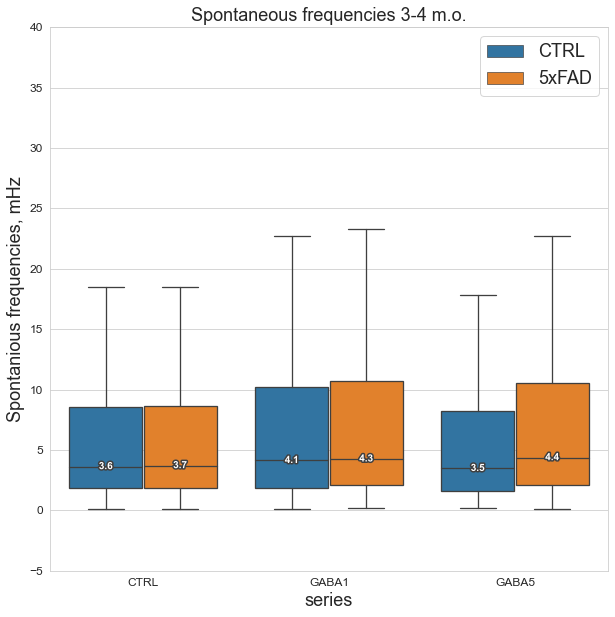

In [120]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=spont_freq_4m, x="series", y="spont_freq", hue="type", linewidth = 1.3, showfliers=False)
add_median_labels(ax)
ax.set_title('Spontaneous frequencies 3-4 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('Spontanious frequencies, mHz', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(-5,40)
plt.savefig('common_res/Spont_freq_3_4_month.png')
plt.savefig('common_res/Spont_freq_3_4_month.pdf')
plt.show();

In [121]:
ar_ctrl = []
for k in ctrl8m:
    ar_ctrl.append(spont_freqs[k][spont_freqs[k]['ser']=='CTRL'].values.T[1:][:-2])
spont_fr_ctrl_ctrl_8m = []
for ar in ar_ctrl:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_ctrl_ctrl_8m.append(ar[k][i])
spont_fr_ctrl_ctrl_8m_no_nan = [item for item in spont_fr_ctrl_ctrl_8m if not(math.isnan(item)) == True]
spont_fr_ctrl_ctrl_8m = pd.DataFrame(spont_fr_ctrl_ctrl_8m_no_nan, columns=['spont_freq'])
spont_fr_ctrl_ctrl_8m['series'] = ['CTRL'] * len(spont_fr_ctrl_ctrl_8m_no_nan)
spont_fr_ctrl_ctrl_8m['type'] = ['CTRL'] * len(spont_fr_ctrl_ctrl_8m_no_nan)

ar_gaba1 = []
for k in ctrl8m:
    ar_gaba1.append(spont_freqs[k][spont_freqs[k]['ser']=='GABA1'].values.T[1:][:-2])
spont_fr_gaba1_ctrl_8m = []
for ar in ar_gaba1:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_gaba1_ctrl_8m.append(ar[k][i])
spont_fr_gaba1_ctrl_8m_no_nan = [item for item in spont_fr_gaba1_ctrl_8m if not(math.isnan(item)) == True]
spont_fr_gaba1_ctrl_8m = pd.DataFrame(spont_fr_gaba1_ctrl_8m_no_nan, columns=['spont_freq'])
spont_fr_gaba1_ctrl_8m['series'] = ['GABA1'] * len(spont_fr_gaba1_ctrl_8m_no_nan)
spont_fr_gaba1_ctrl_8m['type'] = ['CTRL'] * len(spont_fr_gaba1_ctrl_8m_no_nan)

ar_gaba5 = []
for k in ctrl8m:
    ar_gaba5.append(spont_freqs[k][spont_freqs[k]['ser']=='GABA5'].values.T[1:][:-2])
spont_fr_gaba5_ctrl_8m = []
for ar in ar_gaba5:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_gaba5_ctrl_8m.append(ar[k][i])
spont_fr_gaba5_ctrl_8m_no_nan = [item for item in spont_fr_gaba5_ctrl_8m if not(math.isnan(item)) == True]
spont_fr_gaba5_ctrl_8m = pd.DataFrame(spont_fr_gaba5_ctrl_8m_no_nan, columns=['spont_freq'])
spont_fr_gaba5_ctrl_8m['series'] = ['GABA5'] * len(spont_fr_gaba5_ctrl_8m_no_nan)
spont_fr_gaba5_ctrl_8m['type'] = ['CTRL'] * len(spont_fr_gaba5_ctrl_8m_no_nan)

In [122]:
ar_ctrl = []
for k in ad8m:
    ar_ctrl.append(spont_freqs[k][spont_freqs[k]['ser']=='CTRL'].values.T[1:][:-2])
spont_fr_ctrl_ad8m = []
for ar in ar_ctrl:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_ctrl_ad8m.append(ar[k][i])
spont_fr_ctrl_ad8m_no_nan = [item for item in spont_fr_ctrl_ad4m if not(math.isnan(item)) == True]
spont_fr_ctrl_ad_8m = pd.DataFrame(spont_fr_ctrl_ad8m_no_nan, columns=['spont_freq'])
spont_fr_ctrl_ad_8m['series'] = ['CTRL'] * len(spont_fr_ctrl_ad8m_no_nan)
spont_fr_ctrl_ad_8m['type'] = ['5xFAD'] * len(spont_fr_ctrl_ad8m_no_nan)

ar_gaba1 = []
for k in ad8m:
    ar_gaba1.append(spont_freqs[k][spont_freqs[k]['ser']=='GABA1'].values.T[1:][:-2])
spont_fr_gaba1_ad8m = []
for ar in ar_gaba1:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_gaba1_ad8m.append(ar[k][i])
spont_fr_gaba1_ad8m_no_nan = [item for item in spont_fr_gaba1_ad8m if not(math.isnan(item)) == True]
spont_fr_gaba1_ad_8m = pd.DataFrame(spont_fr_gaba1_ad8m_no_nan, columns=['spont_freq'])
spont_fr_gaba1_ad_8m['series'] = ['GABA1'] * len(spont_fr_gaba1_ad8m_no_nan)
spont_fr_gaba1_ad_8m['type'] = ['5xFAD'] * len(spont_fr_gaba1_ad8m_no_nan)

ar_gaba5 = []
for k in ad8m:
    ar_gaba5.append(spont_freqs[k][spont_freqs[k]['ser']=='GABA5'].values.T[1:][:-2])
spont_fr_gaba5_ad8m = []
for ar in ar_gaba5:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_gaba5_ad8m.append(ar[k][i])
spont_fr_gaba5_ad8m_no_nan = [item for item in spont_fr_gaba5_ad8m if not(math.isnan(item)) == True]
spont_fr_gaba5_ad_8m = pd.DataFrame(spont_fr_gaba5_ad8m_no_nan, columns=['spont_freq'])
spont_fr_gaba5_ad_8m['series'] = ['GABA5'] * len(spont_fr_gaba5_ad8m_no_nan)
spont_fr_gaba5_ad_8m['type'] = ['5xFAD'] * len(spont_fr_gaba5_ad8m_no_nan)

In [123]:
frames5_spont_freq = [spont_fr_ctrl_ctrl_8m, spont_fr_gaba1_ctrl_8m, spont_fr_gaba5_ctrl_8m, spont_fr_ctrl_ad_8m, spont_fr_gaba1_ad_8m, spont_fr_gaba5_ad_8m]
spont_freq_ctrl_8m = pd.concat([spont_fr_ctrl_ctrl_8m, spont_fr_gaba1_ctrl_8m, spont_fr_gaba5_ctrl_8m])
spont_freq_ad_8m = pd.concat([spont_fr_ctrl_ad_8m, spont_fr_gaba1_ad_8m, spont_fr_gaba5_ad_8m])
spont_freq_8m = pd.concat(frames5_spont_freq)
spont_freq_ad_8m = spont_freq_ad_8m.query(f"spont_freq != {np.inf}")

In [124]:
spont_freq_8m['spont_freq'] = spont_freq_8m['spont_freq'].apply(lambda x: x*1000)

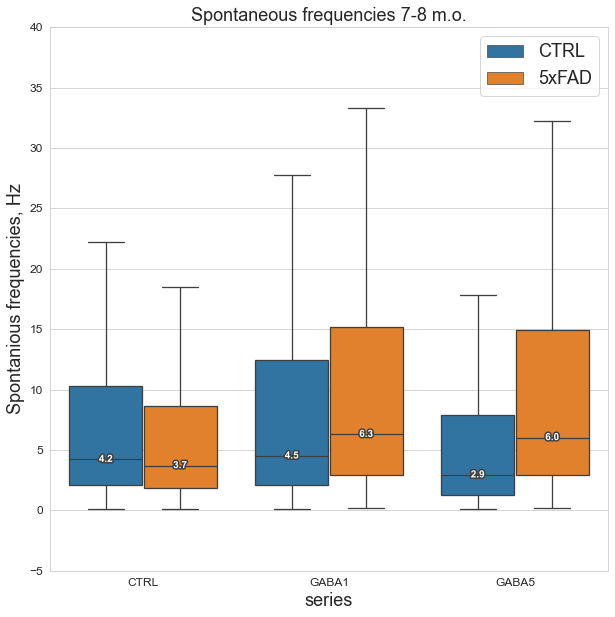

In [125]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data=spont_freq_8m, x="series", y="spont_freq", hue="type", linewidth = 1.3, showfliers=False)
add_median_labels(ax)
ax.set_title('Spontaneous frequencies 7-8 m.o.', fontsize=18)
ax.set_xlabel('series', fontsize=18)
ax.set_ylabel('Spontanious frequencies, Hz', fontsize=18);
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.legend(fontsize=18)
plt.ylim(-5,40)
plt.savefig('common_res/Spont_freq_7_8_month.png')
plt.savefig('common_res/Spont_freq_7_8_month.pdf')
plt.show();